22050


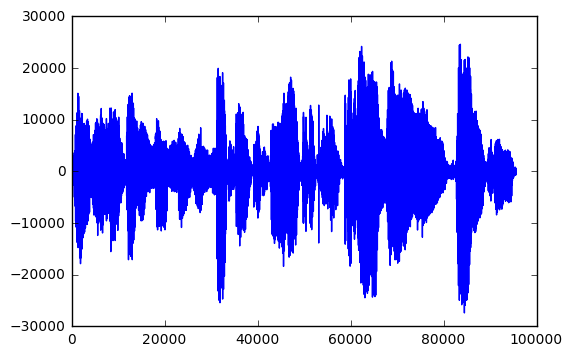

In [17]:
%matplotlib inline
from __future__ import division
import pylab as pl
import numpy as np
import scipy.io.wavfile as wavf
import math
import sys

def readWavFile(name):
    frequencySample, signal = wavf.read(name)
    return frequencySample, signal

def preprocessSignal(signal):
    signal = makeMono(signal)
    signal = removeSilence(signal)
    return signal

def makeMono(signal):
    finalSignal = []
    for s in signal:
        if isNumber(s):
            finalSignal.append(s)
        else:
            stereoMean = np.int16((s[0] + s[1]) / 2)
            finalSignal.append(stereoMean)
            
    return np.array(finalSignal)

def isNumber(value):
    return type(value) is np.int16

def removeSilence(signal):
    finalSignal = []
    threshold = 400
    for s in signal:
        if abs(s) > threshold:
            finalSignal.append(s)
    
    return np.array(finalSignal)

if __name__ == '__main__':
#     frequencySample, signal = readWavFile(sys.argv[0]) # final version
    freqSample, signal = readWavFile('train/004_M.wav') # test version
    signal = preprocessSignal(signal)
#     wavf.write('voice.wav', freqSample, signal)
    # for v in signal:
    #     print(v)
    print(freqSample)
    pl.plot(signal)
    # pl.plot(signal[:,0], signal[:,1])
    # pl.plot(signal[:,0])
    # pl.plot(signal[:,1])